In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [25]:
#Loading dataset
data=pd.read_excel("C:/Users/risha/Downloads/Data_GMM.xlsx")

In [26]:
data.head()

,Result 1,Result 2
0,1.790702,0.756250
1,1.287721,0.102399
2,1.003226,0.207663
3,1.365617,0.047025
4,4.526678,1.353905


In [27]:
#assigning X
tr=data.to_numpy()
X=tr[:,0:2]

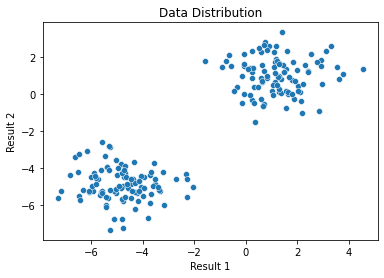

In [28]:
#Plotting Data
def plot(x):
    ax=sns.scatterplot(x=x[:,0], y=x[:, 1]).set_title("Data Distribution")
    plt.xlabel("Result 1")
    plt.ylabel("Result 2")
plot(X)    

In [29]:
from scipy.stats import multivariate_normal

In [30]:
class GMM:
    def __init__(self, k, max_iter=5):
        self.k = k
        self.max_iter = int(max_iter)

    def initialize(self, X):
        self.shape = X.shape
        self.n, self.m = self.shape

        self.phi = np.full(shape=self.k, fill_value=1/self.k)
        self.weights = np.full( shape=self.shape, fill_value=1/self.k)
        
        random_row = np.random.randint(low=0, high=self.n, size=self.k)
        self.mu = [  X[row_index,:] for row_index in random_row ]
        self.sigma = [ np.cov(X.T) for _ in range(self.k) ]

    def e_step(self, X):
        # update weights and phi holding mu and sigma constant
        self.weights = self.predict_proba(X)
        self.phi = self.weights.mean(axis=0)
    
    def m_step(self, X):
        # update mu and sigma holding phi and weights constant
        for i in range(self.k):
            weight = self.weights[:, [i]]
            total_weight = weight.sum()
            self.mu[i] = (X * weight).sum(axis=0) / total_weight
            self.sigma[i] = np.cov(X.T, 
                aweights=(weight/total_weight).flatten(), 
                bias=True)

    def fit(self, X):
        self.initialize(X)
        
        for iteration in range(self.max_iter):
            self.e_step(X)
            self.m_step(X)
            
    def predict_proba(self, X):
        likelihood = np.zeros( (self.n, self.k) )
        for i in range(self.k):
            distribution = multivariate_normal(
                mean=self.mu[i], 
                cov=self.sigma[i])
            likelihood[:,i] = distribution.pdf(X)
        
        numerator = likelihood * self.phi
        denominator = numerator.sum(axis=1)[:, np.newaxis]
        weights = numerator / denominator
        return weights
    
    def predict(self, X):
        weights= self.predict_proba(X)
        return np.argmax(weights, axis=1), self.mu, self.sigma

In [31]:
np.random.seed(10)
gmm = GMM(k=2, max_iter=1000)
gmm.fit(X)
pred, mean_, co=gmm.predict(X)
prediction=[pred]
prediction=np.array(prediction)
prediction=prediction.T

In [32]:
mean_=np.array(mean_)
print(mean_)

[[ 1.19721315  1.00893775]
 [-4.81815103 -4.87158388]]


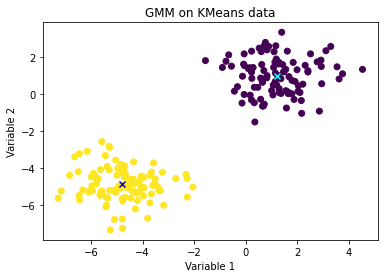

In [33]:
def plot_x(x, y, means):
    plt.scatter(x[:,0], x[:, 1], c=y)
    plt.scatter(means[0,0], means[0,1], color='cyan', marker='x')
    plt.scatter(means[1,0], means[1,1], color='blue', marker='x')
    plt.xlabel("Variable 1")
    plt.ylabel("Variable 2")
    plt.title("GMM on KMeans data")
plot_x(X,prediction, mean_)  

In [115]:
#covariance matrix
co

[array([[1.19169015, 0.00910693],
        [0.00910693, 0.97049735]]),
 array([[ 1.16968737, -0.10528566],
        [-0.10528566,  0.80018909]])]